## **The Simpson Index (D) With Python**

The Simpson Index (D) measures the probability that two individuals randomly selected from a sample belong to the same species. It reflects biodiversity, particularly the dominance or evenness of species in a community.

## **Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## **Loading the dataset**

In [3]:
df = pd.read_csv('Datasets/weed_species_diversity.csv')
df.head(10)

,WeedID,Block_ID,Common Name,Scientific Name,Count
0,10012797,Block 5,Knapweed,Senecio vulgaris,412
1,10028051,Block 2,Groundsel,Setaria faberi,242
2,10065340,Block 1,Lambsquarters,Ambrosia artemisiifolia,179
3,10003235,Block 1,Bindweed,Setaria faberi,281
4,10057117,Block 3,Clover,Cyperus esculentus,351
5,10036856,Block 2,Bindweed,Chenopodium album,414
6,10088345,Block 5,Henbit,Taraxacum officinale,488
7,10057369,Block 4,Lambsquarters,Setaria faberi,469
8,10061074,Block 4,Goosegrass,Lamium amplexicaule,406
9,10036539,Block 3,Chickweed,Chenopodium album,402


## Simpson Index Function

In [4]:
def simpson_index(species_counts):
    N = sum(species_counts)  # Total number of individuals
    if N < 2:
        return 0  # Avoid division by zero for small datasets
    
    numerator = sum(n * (n - 1) for n in species_counts)
    denominator = N * (N - 1)
    
    return numerator / denominator

In [5]:
species_counts = df['Count']
Simpson_Index = simpson_index(species_counts)
print(f"Simpson Index: {Simpson_Index:.4f}")

Simpson Index: 0.0013


## Group by `Group` and calculate Simpson Index

In [6]:
simpson_indices = df.groupby("Block_ID")['Count'].apply(simpson_index).reset_index(name='Index').sort_values(by='Index', ascending=False)
simpson_indices

,Block_ID,Index
2,Block 3,0.007080
0,Block 1,0.006751
4,Block 5,0.006667
1,Block 2,0.006562
3,Block 4,0.006002


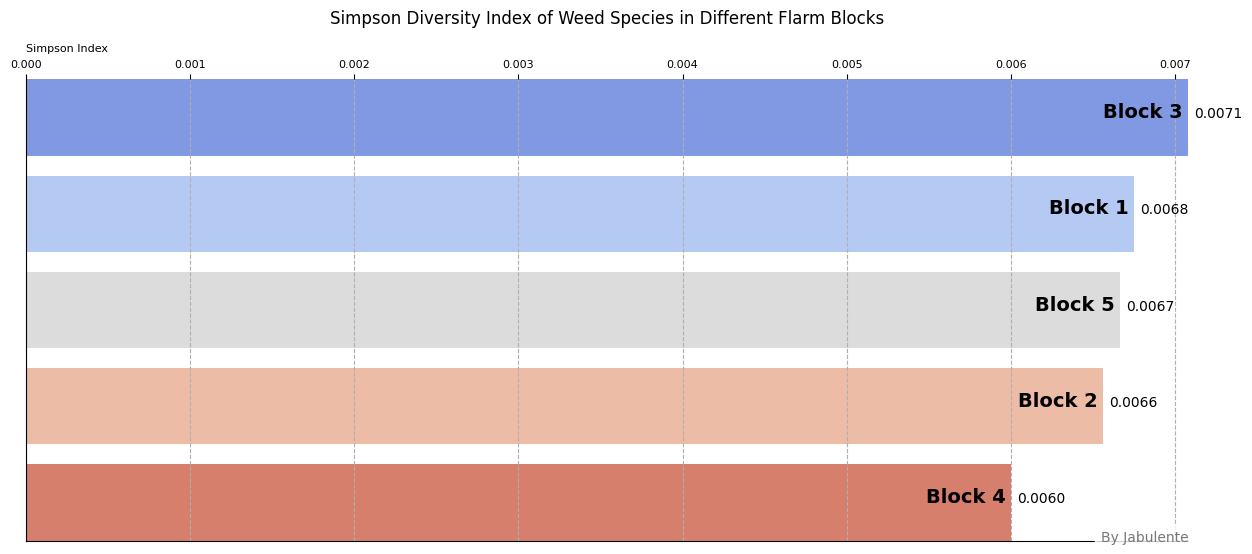

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(simpson_indices, x="Index", y="Block_ID", hue='Block_ID', palette='coolwarm', ax=ax, orient="h")
ax.text(0, 1.06, 'Simpson Index', transform=ax.transAxes, size=8, color='black')
ax.text(1, 0, 'By Jabulente', transform=ax.transAxes, color='#777777', ha='right', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.3f}'))
ax.xaxis.set_ticks_position('top') 
ax.tick_params(axis='x', colors='black', labelsize=8)

ax.set_title('Simpson Diversity Index of Weed Species in Different Flarm Blocks', pad=40)

dx = simpson_indices['Index'].max() / 200
for i, (value, group) in enumerate(zip(simpson_indices["Index"], simpson_indices["Block_ID"])):
    ax.text(value-dx, i, group, size=14, weight=600, ha='right', va='baseline')
    ax.text(value+dx, i-.0,  f'{value:,.4f}',  size=10, ha='left',  va='baseline')

ax.grid(which='major', axis='x', linestyle='--')
ax.set_ylabel('')
ax.set_xlabel('')
sns.despine()
ax.grid(axis='x', visible=True)
ax.margins(0, 0.001, )
ax.yaxis.set_ticks([])
ax.yaxis.set_ticklabels([])
plt.show()

### Interpretation

Value Range:
The Simpson Index ranges between 0 and 1:

- 1 : Maximum dominance, meaning the community is entirely dominated by one species.

- 0 : High biodiversity, meaning individuals are evenly distributed among many species.


---

### Key Concepts

1. Dominance: A high  value indicates that one or a few species dominate the community (low diversity).

2. Evenness: A lower  value suggests species are more evenly distributed, with no single species dominating (high diversity).


### Practical Applications

1. Ecology: Assessing biodiversity in ecosystems. Comparing biodiversity across different habitats or over time.

2. Conservation: Identifying ecosystems at risk due to low diversity.

3. Agriculture: Evaluating diversity in crop fields to manage pest or disease risks.
